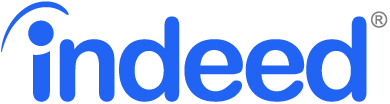

#### Author: Lauro Cesar Ribeiro

On this project I scraped current Data Analytics job openings from Indeed.com in Ireland in January 2021.

I created a Word Cloud to see the most frequent words for Job Titles, Companies and Location.

In [1]:
import csv
from datetime import datetime
import requests
from bs4 import BeautifulSoup


def get_url(position, location):
    """Generate url from position and location"""
    template = 'https://ie.indeed.com/jobs?q={}&l={}'
    position = position.replace(' ', '+')
    location = location.replace(' ', '+')
    url = template.format(position, location)
    return url


def get_record(card):
    """Extract job data from a single record"""
    
    job_title = card.h2.a.get('title')
    company = card.find('span', 'company').text.strip()
    job_location = card.find('div', 'recJobLoc').get('data-rc-loc')
    post_date = card.find('span', 'date').text
    today = datetime.today().strftime('%Y-%m-%d')
    summary = card.find('div', 'summary').text.strip().replace('\n', ' ')
    job_url = 'https://ie.indeed.com' + card.h2.a.get('href')

    # this does not exists for all jobs, so handle the exceptions
    salary_tag = card.find('span', 'salaryText')
    if salary_tag:
        salary = salary_tag.text.strip()
    else:
        salary = ''  
        
    record = (job_title, company, job_location, post_date, today, summary, salary, job_url)
    return record


def main(position, location):
    """Run the main program routine"""
    records = []
    url = get_url(position, location)
    
    # extract the job data
    while True:
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')
        cards = soup.find_all('div', 'jobsearch-SerpJobCard')
        for card in cards:
            record = get_record(card)
            records.append(record)
        try:
            url = 'https://ie.indeed.com' + soup.find('a', {'aria-label': 'Next'}).get('href')
        except AttributeError:
            break
        
    # save the job data
    with open('data_analytics.csv', 'w', newline='', encoding='utf-8') as f:
        writer = csv.writer(f)
        writer.writerow(['JobTitle', 'Company', 'Location', 'PostDate', 'ExtractDate', 'Summary', 'Salary', 'JobUrl'])
        writer.writerows(records)
        
main("data analytics", "Ireland")

In [199]:
import pandas as pd
import numpy as np

data = pd.read_csv("data_analytics.csv")
data.head()

,JobTitle,Company,Location,PostDate,ExtractDate,Summary,Salary,JobUrl
0,"Big Data, Data Warehouses, Business Intelligen...",Sonra Intelligence Limited.,Dublin,7 days ago,2021-01-22,Good understanding of data and data warehouse ...,NaN,https://ie.indeed.com/company/sonra/jobs/Big-D...
1,Data Scientist Internship Programme,Idiro Analytics,Dublin,10 days ago,2021-01-22,"Learn how to manipulate, transform and wrangle...",NaN,https://ie.indeed.com/company/Idiro-Analytics/...
2,Data Analyst,Affirma Consulting ED,Dublin,1 day ago,2021-01-22,Analysing and documenting Operational processe...,"€35,000 a year",https://ie.indeed.com/company/Affirma-Consulti...
3,Graduate Opportunities – Data & Analytics – Su...,BearingPoint Ireland,Dublin,30+ days ago,2021-01-22,A keen interest in the role of data and analyt...,NaN,https://ie.indeed.com/rc/clk?jk=012fdafdde0bb6...
4,"Data Analyst, People Development",Google,Dublin,3 days ago,2021-01-22,Build and maintain critical data infrastructur...,NaN,https://ie.indeed.com/rc/clk?jk=be5fd2d8be96ad...


In [200]:
data.describe()

,JobTitle,Company,Location,PostDate,ExtractDate,Summary,Salary,JobUrl
count,1034,1034,1034,1034,1034,1034,108,1034
unique,838,380,51,25,1,778,58,976
top,Social Media and Marketing Assistant,Microsoft,Dublin,30+ days ago,2021-01-22,Recommending and implementing changes and impr...,"€45,000 - €55,000 a year",https://ie.indeed.com/rc/clk?jk=4505ba56b333a0...
freq,35,41,716,554,1034,35,8,2


In [201]:
data.columns

Index(['JobTitle', 'Company', 'Location', 'PostDate', 'ExtractDate', 'Summary',
       'Salary', 'JobUrl'],
      dtype='object')

In [202]:
data.isnull().any()

JobTitle       False
Company        False
Location       False
PostDate       False
ExtractDate    False
Summary        False
Salary          True
JobUrl         False
dtype: bool

In [203]:
data["Salary"].fillna(0, inplace = True) 
data.isnull().any()

JobTitle       False
Company        False
Location       False
PostDate       False
ExtractDate    False
Summary        False
Salary         False
JobUrl         False
dtype: bool

In [204]:
data.dtypes

JobTitle       object
Company        object
Location       object
PostDate       object
ExtractDate    object
Summary        object
Salary         object
JobUrl         object
dtype: object

# Generating Word Clouds from Job Titles

In [205]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

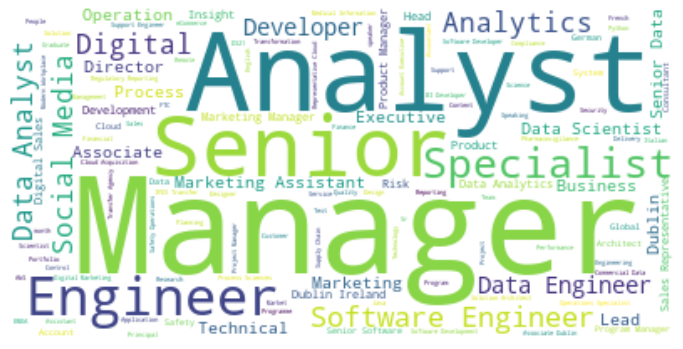

In [206]:
jobtitle = " ".join(title for title in data.JobTitle)

# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(jobtitle)

# Display our Word Cloud
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

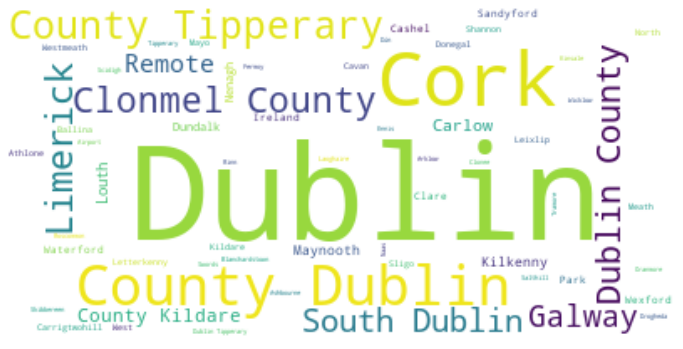

In [207]:
location = " ".join(title for title in data.Location)

# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(location)

# Display our Word Cloud
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

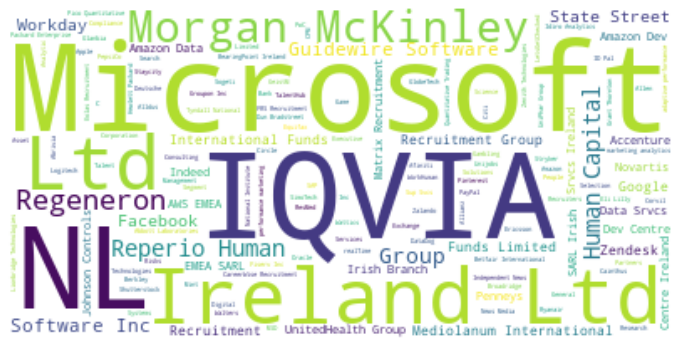

In [208]:
company = " ".join(title for title in data.Company)

wordcloud = WordCloud(background_color="white").generate(company)

# Display our Word Cloud
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

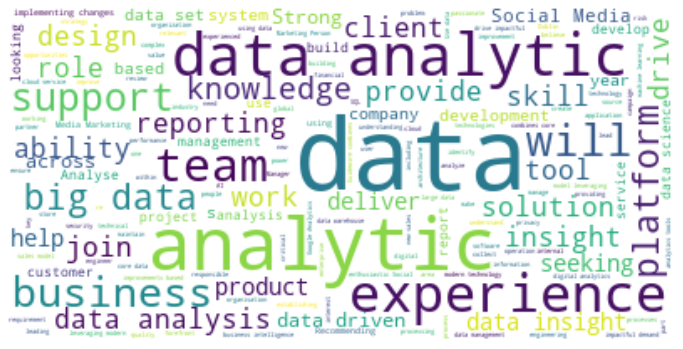

In [209]:
summary = " ".join(title for title in data.Summary)

# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(summary)

# Display our Word Cloud
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()